# Tutorial 3 applying our knowledge to solve Chem Reactor problems

So we already know how to do the basic operations such as variable operations, loops, conditions, numpy operations, plotting

Now it is time to use all of those together with other cool python modules to solve engineering problems.

If you don't know how to do those problems it's ok, start small and make your way up.

The easiest example we could do would be to analyze the chemical reaction kinetics in the simplest case:

## Problem 1:

*A -> B *

We assume it is a first order reaction and we use the design equation from the Batch reactor:

So that means that $-r_A = k C_A$.

Lets assume $k = 10^{-3} 1/s$ and $C_A(t=0) = 10$ moles

So we can expect that the half-time of A should be around 10000 seconds which is ~3 hours.

Ok lets see that through Python.

We want to track the concentration which we will call $y_A$.

$dy_A/dt = - k C_A = -k y_A$

Main thing that we need to use here is the ODEINT module:

`from scipy.integrate import odeint`

In this module if you have an equation $\frac{dy}{dt} = f(y,t)$ you need:

- To define at least the Python function f which implements the mathematical function $f$. It must take a vector  y and a time t, and return the new vector f(y,t).


Some additional commands that you may need in your script:

```python
#lets import the modules # plotting everything inline
# %matplotlib inline 
import matplotlib.pyplot as plt # plotting modules
plt.style.use('presentation') # just have in your script for prettier plotting
import numpy as np # our matlab-like module
from scipy.integrate import odeint # integration of ODEs so you don't have to write your finite difference yourself
```

To plot your data use these commands:

```python
plt.plot(times, y_A_exact,'k--', label='analytical')
plt.xlabel('$t [s]$')
plt.ylabel('$C_A [moles]$')
plt.legend()
plt.savefig('odeint.pdf')
plt.show()

```





/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


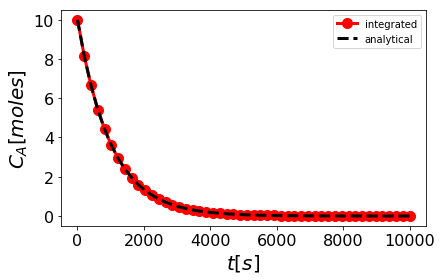

In [3]:
#lets import the modules # plotting everything inline
%matplotlib inline 
import matplotlib.pyplot as plt # plotting modules
plt.style.use('presentation') # just have in your script for prettier plotting
import numpy as np # our matlab-like module
from scipy.integrate import odeint # integration of ODEs so you don't have to write your finite difference yourself

#reaction order
def f(y, t):
    return -k*y

k = 0.001 # L/(mol*sec)
time_start = 0 #s
time_finish = 10000 #s
N_points = 50

times = np.linspace(time_start,time_finish,N_points)
y_A0 = 10. # moles

y_A_calc = odeint(f, y_A0, times)
plt.plot(times, y_A_calc, 'ro-', label='integrated')


y_A_exact = y_A0*np.exp(-k*times)
plt.plot(times, y_A_exact,'k--', label='analytical')


plt.xlabel('$t [s]$')
plt.ylabel('$C_A [moles]$')
plt.legend()
plt.savefig('odeint.pdf')
plt.show()


Now lets do the same calculation as the case number 1 but we will use the conversion factor $X_A$ as our variable:

$X_A = \dfrac{N_{A0} - N_A}{N_{A0}} = \dfrac{C_{A0} - C_A}{C_{A0}}$ if the volume $V=const$

So the design equation looks like:

$\dfrac{d X_A}{dt} = (-r_A/N_{A0}) V $


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


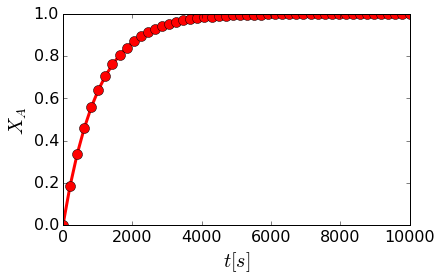

In [11]:
%reset

%matplotlib inline
import matplotlib.pyplot as plt # plotting modules
plt.style.use('presentation') # just have in your script for prettier plotting
import numpy as np # our matlab-like module
from scipy.integrate import odeint # integration of ODEs so you don't have to write your finite difference yourself


plt.clf()
k=0.001
y_A0 = 10.
time_start = 0 #s
time_finish = 10000 #s
N_points = 50

times = np.linspace(time_start,time_finish,N_points)

y_A_exact = y_A0*np.exp(-k*times)

x_A = ((y_A0 - y_A_exact)/y_A0)
# print(y_A_exact)
# print(x_A)
plt.plot(times, x_A, 'ro-')

plt.xlabel('$t [s]$')
plt.ylabel('$X_A$')
plt.legend()
# plt.savefig('conversion factor.pdf')
plt.show()


## Problem 2:

*2A ->B*

We assume it is a first order reaction and we use the design equation from the Batch reactor:

So that means that $-r_A = k [C_A]^2$.

Lets assume $k = 10^{-3} 1/s$ and $C_A(t=0) = 10$ moles

So we can expect that the half-time of A should be around 10000 seconds which is ~3 hours.

Ok lets see that through Python.

We want to track the concentration which we will call $y_A$.

$dy_A/dt = - k C_A = -k y^2_A$

The exact solution here would be

$ 1/y_A = kt + C$
$y_A(0) = 10$ => $C = 1/10$


$1/y_A = kt + 1/y_A_0$

So now it is easier to track $1/y_A$ rather than the function itself


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


/Users/bazilevs/Downloads/yes/envs/mypython3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


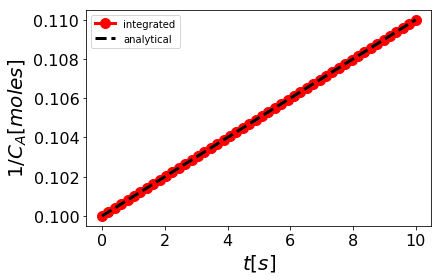

In [39]:
# %matplotlib inline 
%reset
import matplotlib.pyplot as plt # plotting modules
plt.style.use('presentation') # just have in your script for prettier plotting
import numpy as np # our matlab-like module
from scipy.integrate import odeint # integration of ODEs so you don't have to write your finite difference yourself

#reaction order
def f(y, t):
    return -k*y**2

k = 0.001 # 1/sec
time_start = 0 #s
time_finish = 10 #s
N_points = 50

times = np.linspace(time_start,time_finish,N_points)
y_A0 = 10. # moles

y_A_calc = odeint(f, y_A0, times)
plt.plot(times, 1./y_A_calc, 'ro-', label='integrated')


inverse_y_A_exact = (1/y_A0 + k*times)
plt.plot(times, inverse_y_A_exact,'k--', label='analytical')


plt.xlabel('$t [s]$')
plt.ylabel('$1/C_A [moles]$')
plt.legend()
# plt.savefig('odeint.pdf')
plt.show()

# Solving Algebraic equations in Python:


Let's say we have a nonlinear equation 

$x^2 - log_{10}(x) = 1$

The equation can be easily solved using the method of "thorough observation"

x = 1 is the root

How do we find it numerically?


```python
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
```

```python
def func(x):
    return x**2 - np.log10(x) - 1
fsolve(func, 0.5)
```

And that is it! Nothing more! Imagine how useful that would be for the Thermo 346 course =)


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

def func(x):
    return x**2 - np.log10(x) - 1
answer = fsolve(func, 0.5)
print(answer[0])


1.0


## Problem 3: CSTR 

From solving ODE now we are going to solve "Simple" algebraic equations.

Given a continuously stirred tank reactor with a volume of $66 m^3$ where the reaction $A \to B$ occurs, at a rate of $−r_A= k C^2_A$ ($k=3 L/mol/h$), with an entering molar flow of $F_{A0} = 5 mol/h$ and a volumetric flowrate of $\upsilon = 10 L/h$, what is the exit concentration of A?

From a mole balance we know that at steady state $0=F_{A0}−F_A+ V \cdot r_A$. That equation simply states the sum of the molar flow of A in in minus the molar flow of A out plus the molar rate A is generated is equal to zero at steady state. This is directly the equation we need to solve. We need the following relationship:

In [21]:
#Copyright (C) 2013 by John Kitchin

from scipy.optimize import fsolve

Fa0 = 5.0
v0 = 10.

V = 66000.0  # reactor volume L^3
k = 3.0      # rate constant L/mol/h

def func(Ca):
    "Mole balance for a CSTR. Solve this equation for func(Ca)=0"
    Fa = v0 * Ca     # exit molar flow of A
    ra = -k * Ca**2  # rate of reaction of A L/mol/h
    return Fa0 - Fa + V * ra

# CA guess that that 90 % is reacted away
CA_guess = 0.1 * Fa0 / v0
CA_sol, = fsolve(func, CA_guess)

print('The exit concentration is {0} mol/L'.format(CA_sol))

The exit concentration is 0.005 mol/L
